<a href="https://colab.research.google.com/github/dmorton714/data-2-demo/blob/main/week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sqlite3 import connect

## **We are going to read in another data set to answer a new question. *Is there evidence for a correlation between income level and the rate of uninsured for county level data?***

In [2]:
income = pd.read_csv("https://raw.githubusercontent.com/dmorton714/data-2-demo/main/kaggle_income.csv", encoding='latin-1') # this one is encoded in latin-1
income.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [3]:
coverage = pd.read_csv("https://raw.githubusercontent.com/dmorton714/data-2-demo/main/Insurance%20Coverage%20-%20All%20Demographics%20By%20County.csv")
coverage.head()

,index,year,statefips,state_name,countyfips,County,Metric,Value
0,0,01-01-08,1,Alabama,0,State ofAlabama,Number insured,6.540953e+06
1,1,01-01-08,1,Alabama,0,State ofAlabama,Number uninsured,1.181000e+06
2,2,01-01-08,1,Alabama,0,State ofAlabama,Percent Uninsured (All),2.073000e-01
3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,3.847400e+04
4,4,01-01-08,1,Alabama,1,Autauga County,Number uninsured,5.880000e+03


Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html

In [4]:
conn = connect(':memory:')
# create tables
# example: dataframe.to_sql("tablename", conn)
income.to_sql("income", conn)
coverage.to_sql("coverage", conn)
# convenient function
def sql(a_string):
    return(pd.read_sql(a_string, conn))

# Coverage Table

1) Find all the 'Metric' types.


In [9]:
# code goes here 
a_string = """select distinct Metric from coverage"""
sql(a_string)

,Metric
0,Number insured
1,Number uninsured
2,Percent Uninsured (All)


2) What does 'countyfips' = 0 indicate ?


In [ ]:
a_string = """select * from coverage where countyfips=0"""
sql(a_string)

3) Find the number of counties listed for Alabama. <br>
Question could be more specific... did they want distinct list of counties from income or coverage table?


In [17]:
# code goes here 
a_string = """select count(distinct county) from coverage where state_name = 'Alabama'"""
sql(a_string)

,count(distinct county)
0,68


In [16]:
a_string = """select count(distinct county)  from income where State_Name = 'Alabama'"""
sql(a_string)

,count(distinct county)
0,36


4) Which county in Arkansas has the least number of insured?


In [21]:
# code goes here 
a_string = """select county, min(value) from coverage where Metric = 'Number insured' and state_name = 'Arkansas'"""
sql(a_string)

,County,min(value)
0,Calhoun County,3202.0


5) Which state has the the highest number of total uninsured?


In [23]:
# code goes here 
a_string = """select state_name, max(value) from coverage where Metric = 'Number uninsured'"""
sql(a_string)

,state_name,max(value)
0,California,12556975.0


# Income Table

6) For the income dataset how many different place types 'Type' are there?


In [28]:
# code goes here 
a_string = """select count(distinct Type) as distinct_Type from income"""
sql(a_string)

,distinct_Type
0,10


 7) What is the maximum 'Mean' income for a county in the state of Washington?


In [31]:
# code goes here 
a_string = """select max(mean) from income where State_Name = 'Washington'"""
sql(a_string)

,max(mean)
0,187248


8) Which county in the state of Washington has the highest 'Mean' income?


In [32]:
# code goes here 
a_string = """select County, max(mean) from income where State_Name = 'Washington'"""
sql(a_string)

,County,max(mean)
0,Adams County,187248


9) How much does the highest 'Mean' income for the state of Washington differ from the highest 'Median' income?


In [35]:
# Let's piecemeal this..We know how to get the max(mean) for state of Washington from above
a_string = """select max(mean) from income where State_Name = 'Washington'"""
sql(a_string)

,difference
0,112752


In [34]:
# Do the same for median...
a_string = """select max(median) from income where State_Name = 'Washington'"""
sql(a_string)

,max(median)
0,300000


In [36]:
# Now subtract the max values...
a_string = """select (max(median) - max(mean)) as difference
from income where State_Name = 'Washington'"""
sql(a_string)

,difference
0,112752


# Join Income and Coverage Tables

10) Perform an inner join of the coverage and income tables on the column 'County'.


In [38]:
# code goes here 
a_string = """select * from income t1
              join coverage t2
              on t1.County = t2.County limit 10"""
sql(a_string)

,index,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,...,sum_w,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value
0,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,147,147,01-01-08,1,Alabama,97,Mobile County,Number insured,290133.000
1,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,148,148,01-01-08,1,Alabama,97,Mobile County,Number uninsured,58969.000
2,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,149,149,01-01-08,1,Alabama,97,Mobile County,Percent Uninsured (All),0.169
3,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,9726,9726,01-01-09,1,Alabama,97,Mobile County,Number insured,290991.000
4,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,9727,9727,01-01-09,1,Alabama,97,Mobile County,Number uninsured,60737.000
5,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,9728,9728,01-01-09,1,Alabama,97,Mobile County,Percent Uninsured (All),0.173
6,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,19308,19308,01-01-10,1,Alabama,97,Mobile County,Number insured,288389.000
7,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,19309,19309,01-01-10,1,Alabama,97,Mobile County,Number uninsured,66095.000
8,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,19310,19310,01-01-10,1,Alabama,97,Mobile County,Percent Uninsured (All),0.186
9,0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,...,1638.260513,28890,28890,01-01-11,1,Alabama,97,Mobile County,Number insured,287408.000


11) Add an order by 'Mean' income to the join statement, and display the first 20 rows.


In [41]:
# to see all columns use this setting
pd.set_option('display.max_columns',None)
a_string = """select * from income t1
              join coverage t2
              on t1.County = t2.County
              order by mean
              limit 20"""
sql(a_string)

,index,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value
0,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,174,174,01-01-08,1,Alabama,115,St. Clair County,Number insured,57008.000
1,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,175,175,01-01-08,1,Alabama,115,St. Clair County,Number uninsured,10972.000
2,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,176,176,01-01-08,1,Alabama,115,St. Clair County,Percent Uninsured (All),0.161
3,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,2067,2067,01-01-08,17,Illinois,163,St. Clair County,Number insured,197877.000
4,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,2068,2068,01-01-08,17,Illinois,163,St. Clair County,Number uninsured,27173.000
5,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,2069,2069,01-01-08,17,Illinois,163,St. Clair County,Percent Uninsured (All),0.121
6,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,3978,3978,01-01-08,26,Michigan,147,St. Clair County,Number insured,128167.000
7,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,3979,3979,01-01-08,26,Michigan,147,St. Clair County,Number uninsured,16569.000
8,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,3980,3980,01-01-08,26,Michigan,147,St. Clair County,Percent Uninsured (All),0.114
9,50,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,Town,place,35178,205,53311740,978770,33.383145,-86.402544,0,0,0,0.0,4800,4800,01-01-08,29,Missouri,185,St. Clair County,Number insured,5790.000


12) Reverse the order of 'Mean' income and display the first 20 rows.


In [42]:
a_string = """select * from income t1
              join coverage t2
              on t1.County = t2.County
              order by mean desc
              limit 20"""
sql(a_string)

,index,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value
0,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,111,111,01-01-08,1,Alabama,73,Jefferson County,Number insured,478101.000
1,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,112,112,01-01-08,1,Alabama,73,Jefferson County,Number uninsured,78749.000
2,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,113,113,01-01-08,1,Alabama,73,Jefferson County,Percent Uninsured (All),0.141
3,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,444,444,01-01-08,5,Arkansas,69,Jefferson County,Number insured,50669.000
4,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,445,445,01-01-08,5,Arkansas,69,Jefferson County,Number uninsured,12253.000
5,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,446,446,01-01-08,5,Arkansas,69,Jefferson County,Percent Uninsured (All),0.195
6,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,837,837,01-01-08,8,Colorado,59,Jefferson County,Number insured,397242.000
7,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,838,838,01-01-08,8,Colorado,59,Jefferson County,Number uninsured,67324.000
8,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,839,839,01-01-08,8,Colorado,59,Jefferson County,Percent Uninsured (All),0.145
9,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,1080,1080,01-01-08,12,Florida,65,Jefferson County,Number insured,8148.000


13) Add an order by 'Percent Uninsured (All)', and display the first 20 rows.


In [43]:
a_string = """select * from income t1
              join coverage t2
              on t1.County = t2.County
              where Metric = 'Percent Uninsured (All)'
              order by mean, value
              limit 20"""
sql(a_string)

,index,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value
0,13407,2501452,25,Massachusetts,MA,Plymouth County,South Weymouth,Southfield,CDP,place,2190,781,2468089,2867,42.150373,-70.929497,0,0,0,0.0,70820,70820,01-01-15,25,Massachusetts,23,Plymouth County,Percent Uninsured (All),0.027
1,13407,2501452,25,Massachusetts,MA,Plymouth County,South Weymouth,Southfield,CDP,place,2190,781,2468089,2867,42.150373,-70.929497,0,0,0,0.0,61241,61241,01-01-14,25,Massachusetts,23,Plymouth County,Percent Uninsured (All),0.034
2,12844,2401893,24,Maryland,MD,Washington County,Boonsboro,Eakles Mill,CDP,place,21713,301,219926,0,39.467067,-77.685960,0,0,0,0.0,71327,71327,01-01-15,27,Minnesota,163,Washington County,Percent Uninsured (All),0.034
3,13683,25023430,25,Massachusetts,MA,Barnstable County,North Billerica,Barnstable Town city,Track,Track,1862,978,12447312,365418,42.563617,-71.308189,0,0,0,0.0,70787,70787,01-01-15,25,Massachusetts,1,Barnstable County,Percent Uninsured (All),0.035
4,13734,2502390,25,Massachusetts,MA,Barnstable County,Gloucester,Barnstable Town city,Track,Track,1930,978,0,708060742,42.506748,-70.617130,0,0,0,0.0,70787,70787,01-01-15,25,Massachusetts,1,Barnstable County,Percent Uninsured (All),0.035
5,13738,25023930,25,Massachusetts,MA,Barnstable County,Cambridge,Barnstable Town city,Track,Track,2139,617,901795,698900,42.357609,-71.091841,0,0,0,0.0,70787,70787,01-01-15,25,Massachusetts,1,Barnstable County,Percent Uninsured (All),0.035
6,13955,25025890,25,Massachusetts,MA,Barnstable County,Roslindale,Barnstable Town city,Track,Track,2131,617,2713616,19091,42.287994,-71.103404,0,0,0,0.0,70787,70787,01-01-15,25,Massachusetts,1,Barnstable County,Percent Uninsured (All),0.035
7,13957,25025900,25,Massachusetts,MA,Barnstable County,East Boston,Barnstable Town city,Track,Track,2128,617,586981,158875,42.388621,-70.993442,0,0,0,0.0,70787,70787,01-01-15,25,Massachusetts,1,Barnstable County,Percent Uninsured (All),0.035
8,13407,2501452,25,Massachusetts,MA,Plymouth County,South Weymouth,Southfield,CDP,place,2190,781,2468089,2867,42.150373,-70.929497,0,0,0,0.0,42077,42077,01-01-12,25,Massachusetts,23,Plymouth County,Percent Uninsured (All),0.039
9,31441,55011447,55,Wisconsin,WI,Monroe County,Ontario,Ontario,Village,place,54651,608,2602844,20077,43.721919,-90.593219,0,0,0,0.0,69095,69095,01-01-15,17,Illinois,133,Monroe County,Percent Uninsured (All),0.039


14) Reverse the order of  'Percent Uninsured (All)', and display the first 20 rows.


In [57]:
a_string = """select * from income t1
              join coverage t2
              on t1.County = t2.County
              where Metric = 'Percent Uninsured (All)'
              order by mean desc, value desc
              """
dataframe = sql(a_string)
dataframe

,index,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value
0,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,16184,16184,01-01-09,40,Oklahoma,67,Jefferson County,Percent Uninsured (All),0.297
1,560,201700,2,Alaska,AK,Southeast Fairbanks Census Area,Delta Junction,Whitestone,CDP,place,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493,38603,38603,01-01-12,2,Alaska,240,Southeast Fairbanks Census Area,Percent Uninsured (All),0.297
2,560,201700,2,Alaska,AK,Southeast Fairbanks Census Area,Delta Junction,Whitestone,CDP,place,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493,275,275,01-01-08,2,Alaska,240,Southeast Fairbanks Census Area,Percent Uninsured (All),0.295
3,56,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,Town,place,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107,6602,6602,01-01-08,40,Oklahoma,67,Jefferson County,Percent Uninsured (All),0.294
4,560,201700,2,Alaska,AK,Southeast Fairbanks Census Area,Delta Junction,Whitestone,CDP,place,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493,9857,9857,01-01-09,2,Alaska,240,Southeast Fairbanks Census Area,Percent Uninsured (All),0.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115086,13955,25025890,25,Massachusetts,MA,Barnstable County,Roslindale,Barnstable Town city,Track,Track,2131,617,2713616,19091,42.287994,-71.103404,0,0,0,0.000000,70787,70787,01-01-15,25,Massachusetts,1,Barnstable County,Percent Uninsured (All),0.035
1115087,13957,25025900,25,Massachusetts,MA,Barnstable County,East Boston,Barnstable Town city,Track,Track,2128,617,586981,158875,42.388621,-70.993442,0,0,0,0.000000,70787,70787,01-01-15,25,Massachusetts,1,Barnstable County,Percent Uninsured (All),0.035
1115088,13407,2501452,25,Massachusetts,MA,Plymouth County,South Weymouth,Southfield,CDP,place,2190,781,2468089,2867,42.150373,-70.929497,0,0,0,0.000000,61241,61241,01-01-14,25,Massachusetts,23,Plymouth County,Percent Uninsured (All),0.034
1115089,12844,2401893,24,Maryland,MD,Washington County,Boonsboro,Eakles Mill,CDP,place,21713,301,219926,0,39.467067,-77.685960,0,0,0,0.000000,71327,71327,01-01-15,27,Minnesota,163,Washington County,Percent Uninsured (All),0.034


15) Is there evidence for a correlation between income level and the rate of uninsured for county level data?

<Axes: xlabel='Value', ylabel='Mean'>

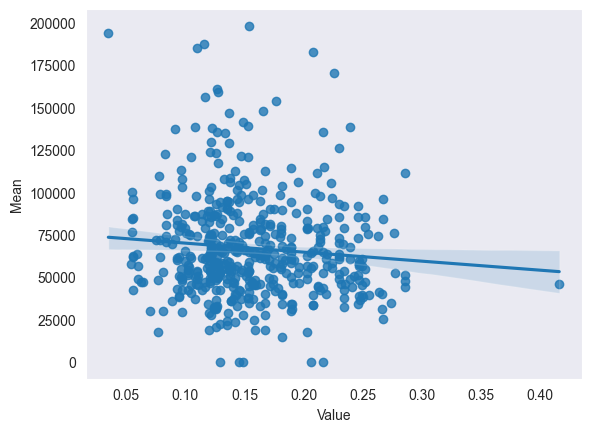

In [60]:
# code goes here 
# from matplotlib import pyplot as plt
import seaborn as sns

sample_df = dataframe.sample(n=500)
sns.set_style('dark')
sns.regplot(x='Value',y='Mean', data=sample_df)